# Feature vs Target Correlation Analysis (Correlation Graphs)

Trying to determine any patterns and correlation between our features and target variable by visualizing the distributions

In [54]:
# import modules 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline 

In [ ]:
df = pd.read_csv('../flight-delay-dataset.csv')
df.head(5)

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,CRS_ARR_M,Temperature,Dew Point,Humidity,...,Condition_Light Snow / Windy,Condition_Mostly Cloudy,Condition_Mostly Cloudy / Windy,Condition_Partly Cloudy,Condition_Partly Cloudy / Windy,Condition_Rain,Condition_Rain / Windy,Condition_Snow,Condition_Wintry Mix,Condition_Wintry Mix / Windy
0,11,1,5,124,636,324,448,48,34,58,...,False,False,False,False,False,False,False,False,False,False
1,11,1,5,371,2475,340,531,48,34,58,...,False,False,False,False,False,False,False,False,False,False
2,11,1,5,181,1069,301,482,48,34,58,...,False,False,False,False,False,False,False,False,False,False
3,11,1,5,168,944,345,513,48,34,58,...,False,False,False,False,False,False,False,False,False,False
4,11,1,5,139,760,360,499,46,32,58,...,False,False,False,False,False,False,False,False,False,False


### Filtering Dataset

In [ ]:
# Remove all values beyond 3 standard deviations from the mean
mean_dep_delay = df['DEP_DELAY'].mean()
std_dep_delay = df['DEP_DELAY'].std()
upper_bound = mean_dep_delay + (3 * std_dep_delay)

df = df[df['DEP_DELAY'] <= upper_bound]

In [57]:
# Considering any flight is delay after 15 minutes
df = df[df['DEP_DELAY'] >= 15]

# Filtering df with Features Outiler Requirments (From training_feature_analysis)
df = df[df['CRS_ELAPSED_TIME'] < 600]
df = df[df['DISTANCE'] < 4000]
df = df[df['CRS_ARR_M'] > 400]

### Correlation Graphs (Feature Vs DEP_DELAY Distribution)

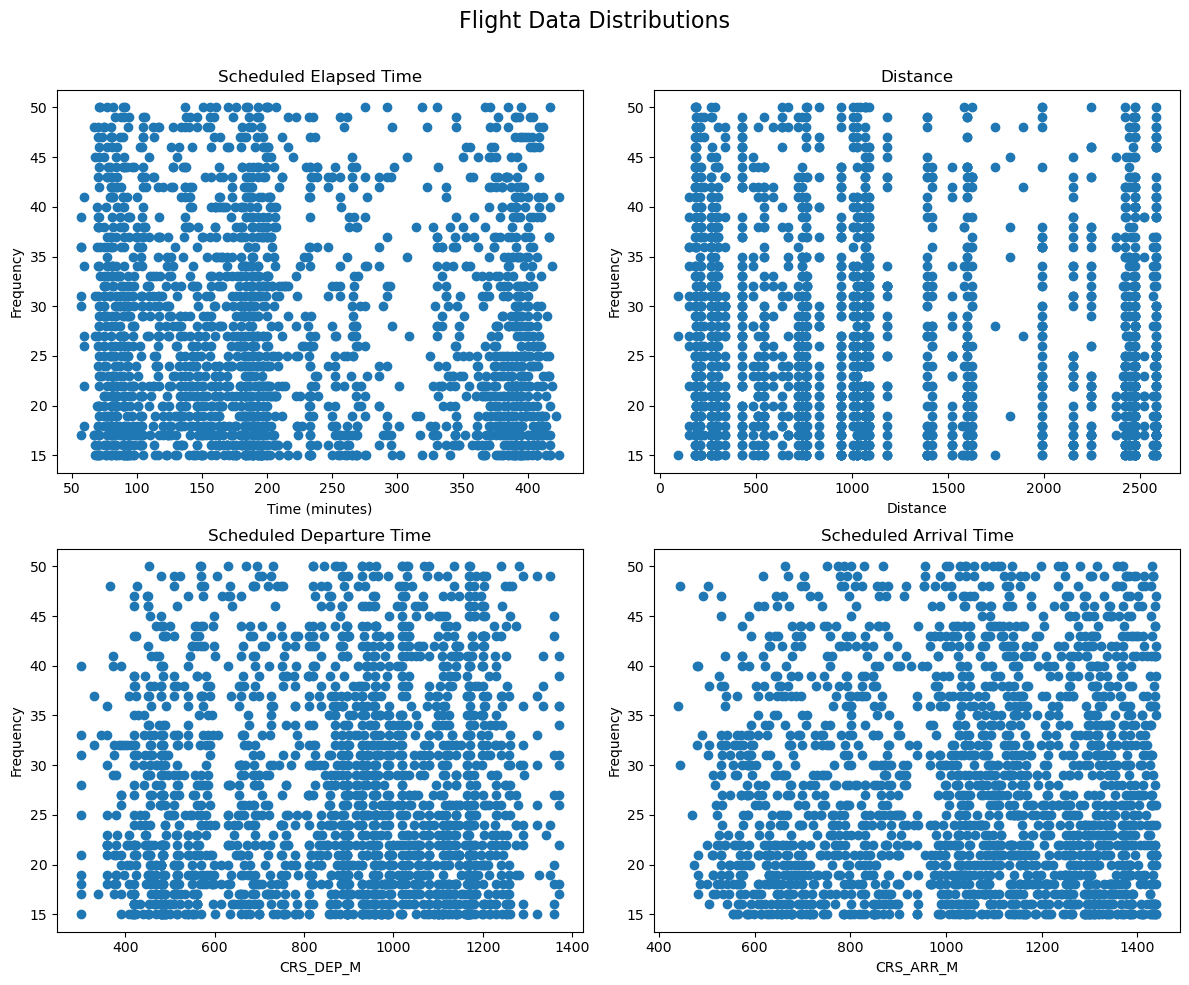

In [58]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot scatter plot  with labels
axs[0, 0].scatter('CRS_ELAPSED_TIME','DEP_DELAY' ,data=df)
axs[0, 0].set_title('Scheduled Elapsed Time')
axs[0, 0].set_xlabel('Time (minutes)')
axs[0, 0].set_ylabel('Frequency')

axs[0, 1].scatter('DISTANCE','DEP_DELAY' ,data=df)
axs[0, 1].set_title('Distance')
axs[0, 1].set_xlabel('Distance')
axs[0, 1].set_ylabel('Frequency')

axs[1, 0].scatter('CRS_DEP_M','DEP_DELAY' ,data=df)
axs[1, 0].set_title('Scheduled Departure Time')
axs[1, 0].set_xlabel('CRS_DEP_M')
axs[1, 0].set_ylabel('Frequency')

axs[1, 1].scatter('CRS_ARR_M','DEP_DELAY' ,data=df)
axs[1, 1].set_title('Scheduled Arrival Time')
axs[1, 1].set_xlabel('CRS_ARR_M')
axs[1, 1].set_ylabel('Frequency')

# Add a main title for the entire figure
fig.suptitle('Flight Data Distributions', fontsize=16)

# Adjust layout for better spacing
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Make space for the suptitle

# Display the plot
plt.show()

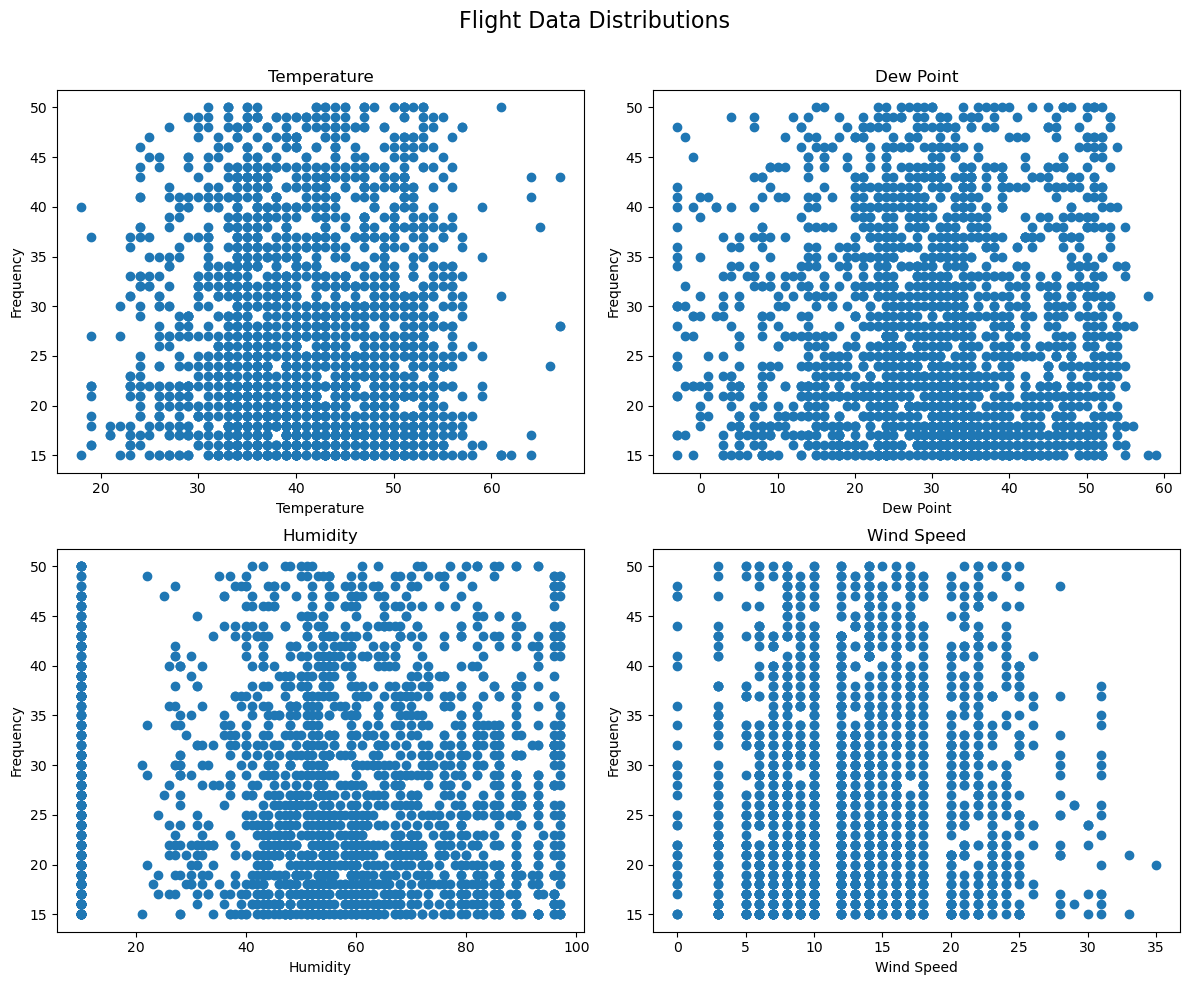

In [59]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot scatter plot with labels
axs[0, 0].scatter('Temperature','DEP_DELAY',data=df)
axs[0, 0].set_title('Temperature')
axs[0, 0].set_xlabel('Temperature')
axs[0, 0].set_ylabel('Frequency')

axs[0, 1].scatter('Dew Point','DEP_DELAY',data=df)
axs[0, 1].set_title('Dew Point')
axs[0, 1].set_xlabel('Dew Point')
axs[0, 1].set_ylabel('Frequency')

axs[1, 0].scatter('Humidity','DEP_DELAY',data=df)
axs[1, 0].set_title('Humidity')
axs[1, 0].set_xlabel('Humidity')
axs[1, 0].set_ylabel('Frequency')

axs[1, 1].scatter('Wind Speed','DEP_DELAY',data=df)
axs[1, 1].set_title('Wind Speed')
axs[1, 1].set_xlabel('Wind Speed')
axs[1, 1].set_ylabel('Frequency')

# Add a main title for the entire figure
fig.suptitle('Flight Data Distributions', fontsize=16)

# Adjust layout for better spacing
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Make space for the suptitle

# Display the plot
plt.show()

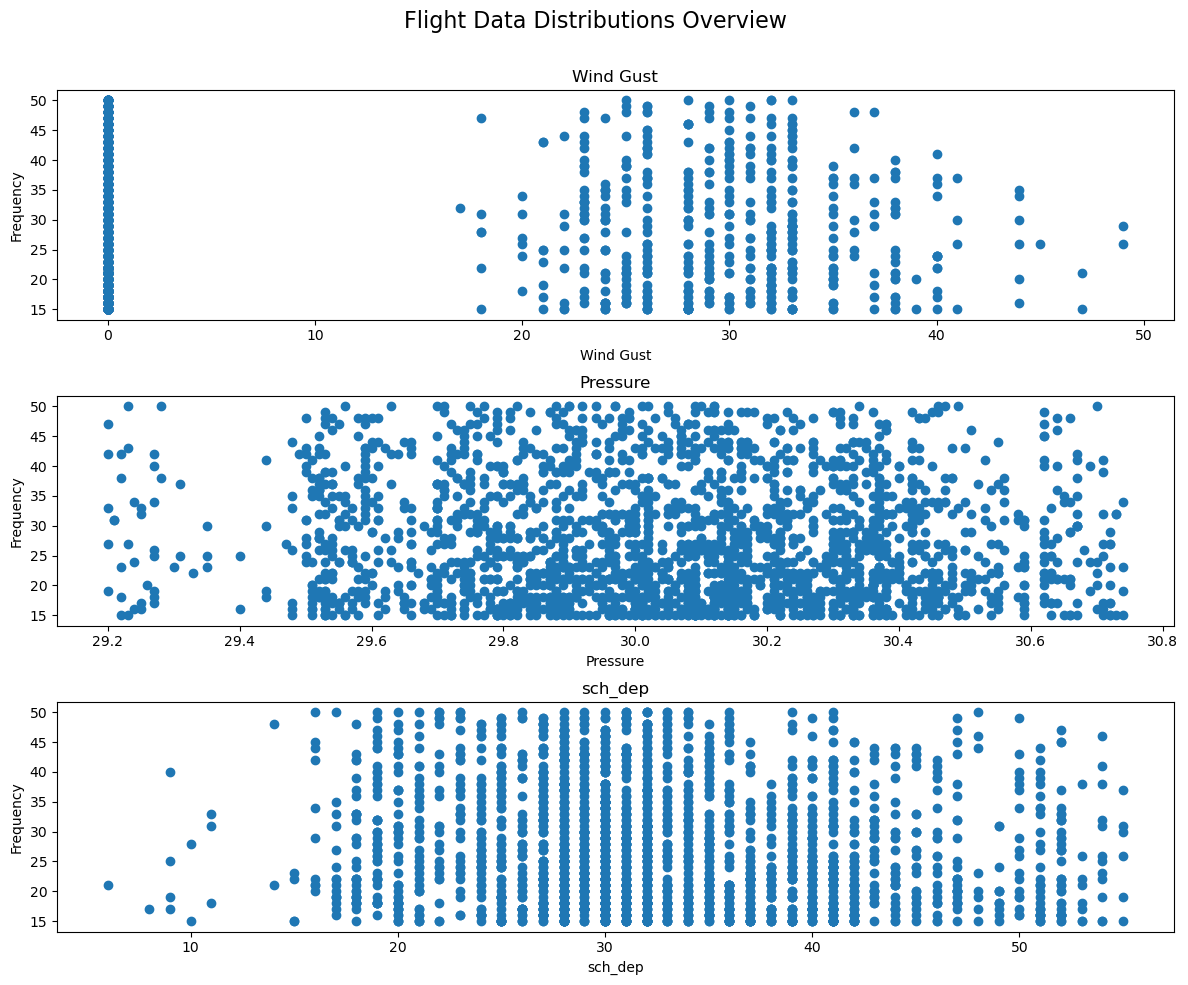

In [60]:
fig, axs = plt.subplots(3, 1, figsize=(12, 10))

# Plot scatter plot  with labels
axs[0].scatter('Wind Gust','DEP_DELAY',data=df)
axs[0].set_title('Wind Gust')
axs[0].set_xlabel('Wind Gust')
axs[0].set_ylabel('Frequency')

axs[1].scatter('Pressure','DEP_DELAY',data=df)
axs[1].set_title('Pressure')
axs[1].set_xlabel('Pressure')
axs[1].set_ylabel('Frequency')

axs[2].scatter('sch_dep','DEP_DELAY',data=df)
axs[2].set_title('sch_dep')
axs[2].set_xlabel('sch_dep')
axs[2].set_ylabel('Frequency')

# Add a main title for the entire figure
fig.suptitle('Flight Data Distributions Overview', fontsize=16)

# Adjust layout for better spacing
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Make space for the suptitle

# Display the plot
plt.show()

### Overview of all features vs target variable

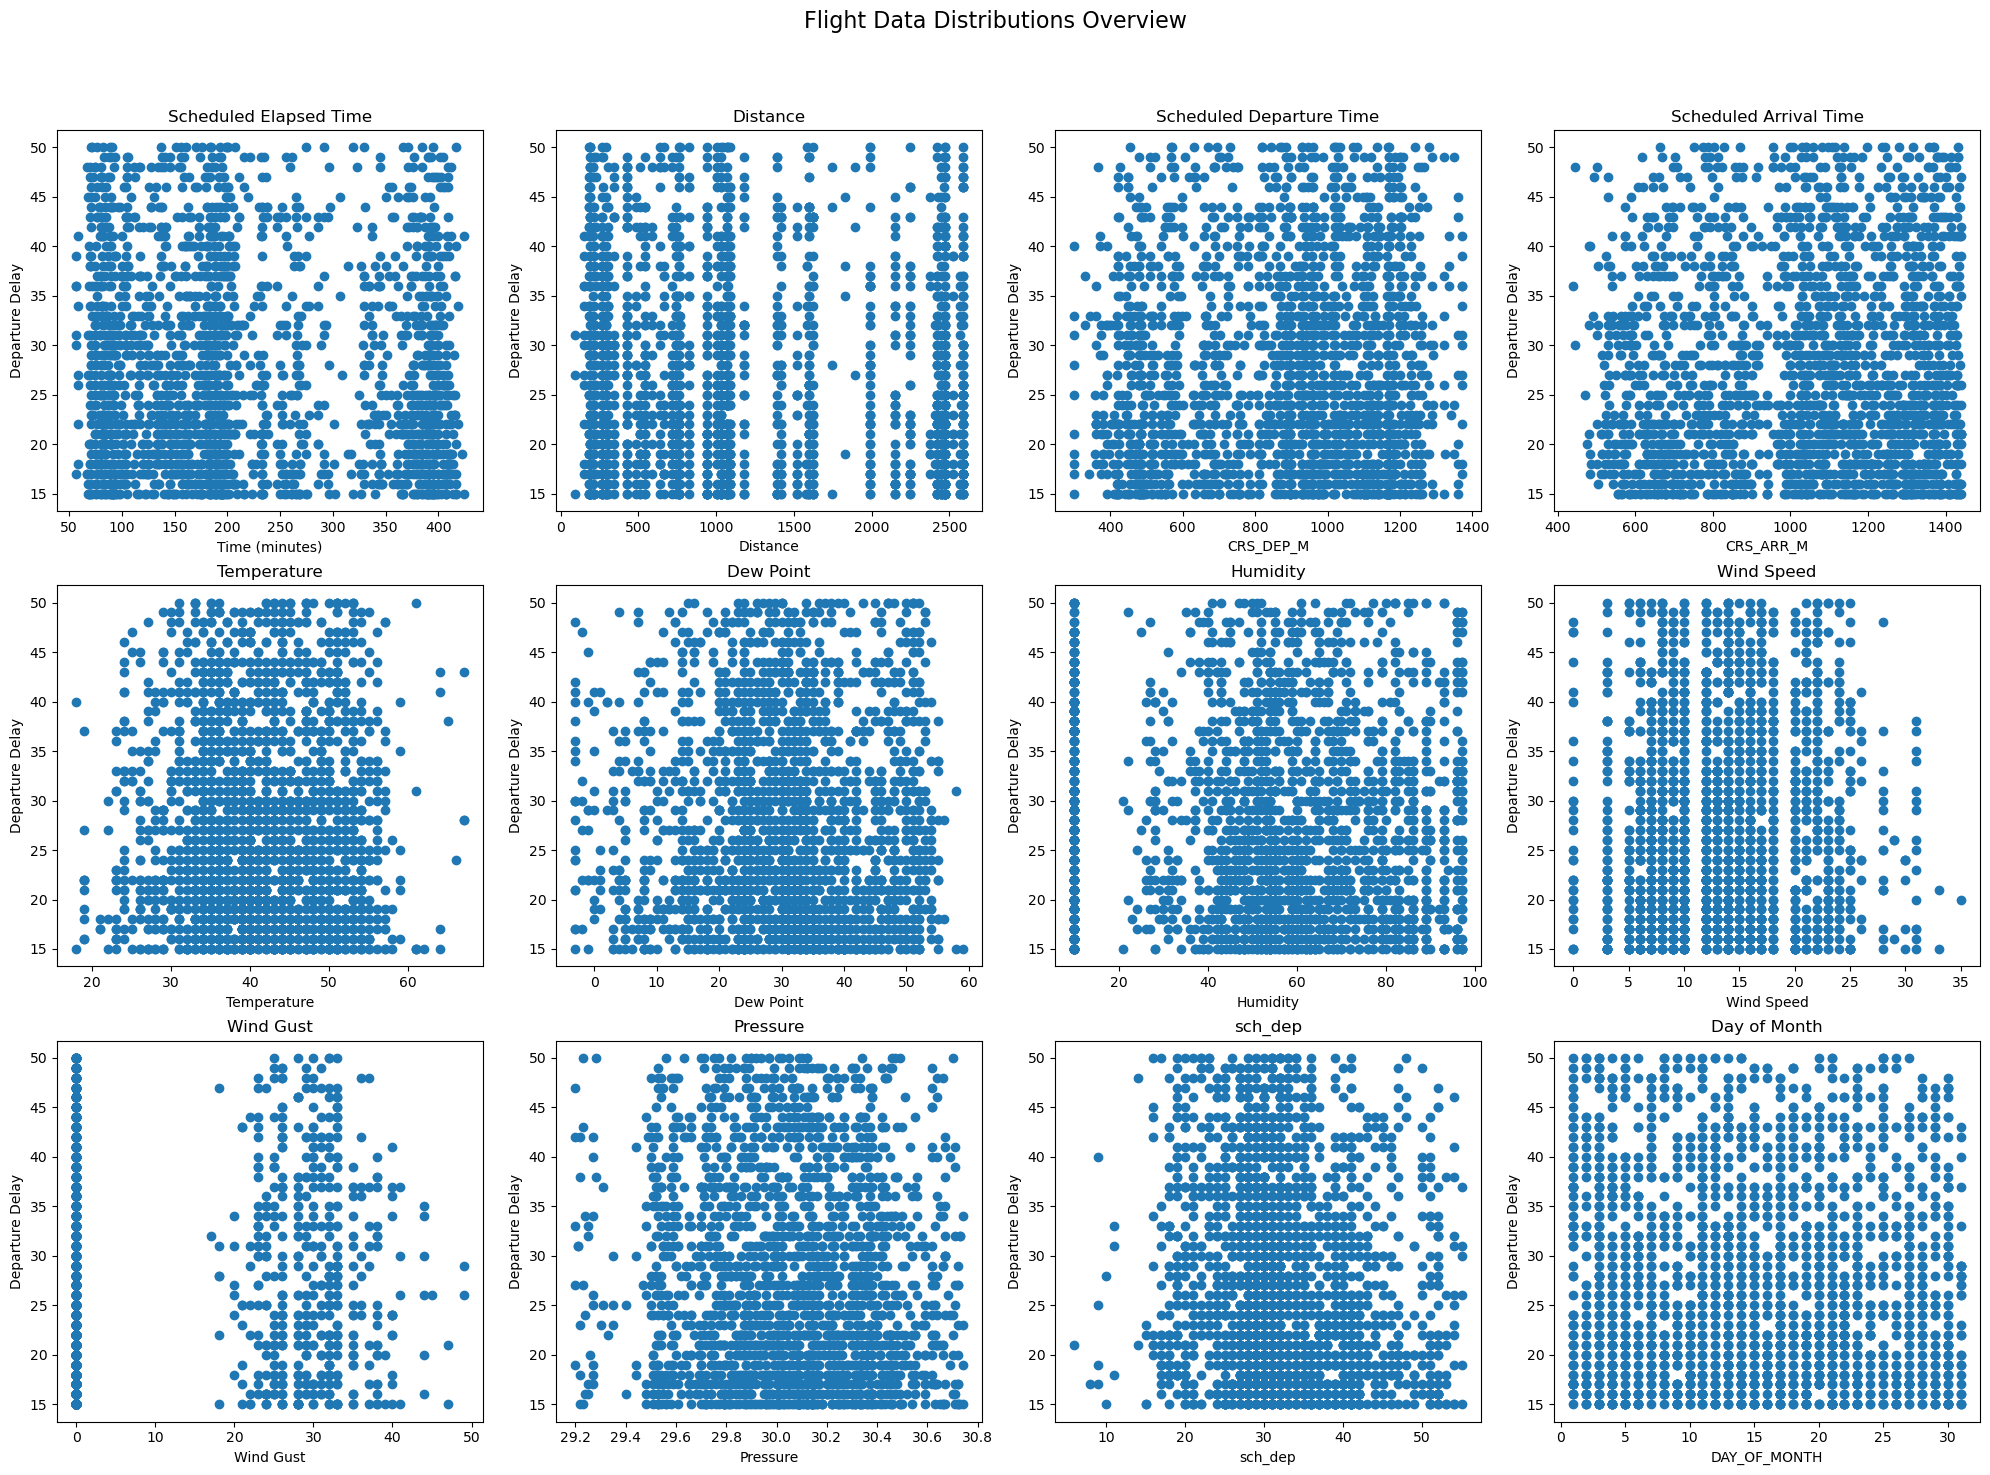

In [61]:
fig, axs = plt.subplots(3, 4, figsize=(20,15))

# Plot scatter plot  with labels
axs[0, 0].scatter('CRS_ELAPSED_TIME','DEP_DELAY' ,data=df)
axs[0, 0].set_title('Scheduled Elapsed Time')
axs[0, 0].set_xlabel('Time (minutes)')
axs[0, 0].set_ylabel('Departure Delay')

axs[0, 1].scatter('DISTANCE','DEP_DELAY' ,data=df)
axs[0, 1].set_title('Distance')
axs[0, 1].set_xlabel('Distance')
axs[0, 1].set_ylabel('Departure Delay')

axs[0,2].scatter('CRS_DEP_M','DEP_DELAY' ,data=df)
axs[0,2].set_title('Scheduled Departure Time')
axs[0,2].set_xlabel('CRS_DEP_M')
axs[0,2].set_ylabel('Departure Delay'),

axs[0,3].scatter('CRS_ARR_M','DEP_DELAY' ,data=df)
axs[0,3].set_title('Scheduled Arrival Time')
axs[0,3].set_xlabel('CRS_ARR_M')
axs[0,3].set_ylabel('Departure Delay')

# Plot scatter plot with labels
axs[1,0].scatter('Temperature','DEP_DELAY',data=df)
axs[1,0].set_title('Temperature')
axs[1,0].set_xlabel('Temperature')
axs[1,0].set_ylabel('Departure Delay')

axs[1,1].scatter('Dew Point','DEP_DELAY',data=df)
axs[1,1].set_title('Dew Point')
axs[1,1].set_xlabel('Dew Point')
axs[1,1].set_ylabel('Departure Delay')

axs[1,2].scatter('Humidity','DEP_DELAY',data=df)
axs[1,2].set_title('Humidity')
axs[1,2].set_xlabel('Humidity')
axs[1,2].set_ylabel('Departure Delay')

axs[1,3].scatter('Wind Speed','DEP_DELAY',data=df)
axs[1,3].set_title('Wind Speed')
axs[1,3].set_xlabel('Wind Speed')
axs[1,3].set_ylabel('Departure Delay')

# Plot scatter plot  with labels
axs[2,0].scatter('Wind Gust','DEP_DELAY',data=df)
axs[2,0].set_title('Wind Gust')
axs[2,0].set_xlabel('Wind Gust')
axs[2,0].set_ylabel('Departure Delay')

axs[2,1].scatter('Pressure','DEP_DELAY',data=df)
axs[2,1].set_title('Pressure')
axs[2,1].set_xlabel('Pressure')
axs[2,1].set_ylabel('Departure Delay')

axs[2,2].scatter('sch_dep','DEP_DELAY',data=df)
axs[2,2].set_title('sch_dep')
axs[2,2].set_xlabel('sch_dep')
axs[2,2].set_ylabel('Departure Delay')

axs[2,3].scatter('DAY_OF_MONTH','DEP_DELAY',data=df)
axs[2,3].set_title('Day of Month')
axs[2,3].set_xlabel('DAY_OF_MONTH')
axs[2,3].set_ylabel('Departure Delay')

# Add a main title for the entire figure
fig.suptitle('Flight Data Distributions Overview', fontsize=16)

# Adjust layout for better spacing
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Make space for the suptitle

# Display the plot
plt.show()

### OP_UNIQUE (Binary Features)

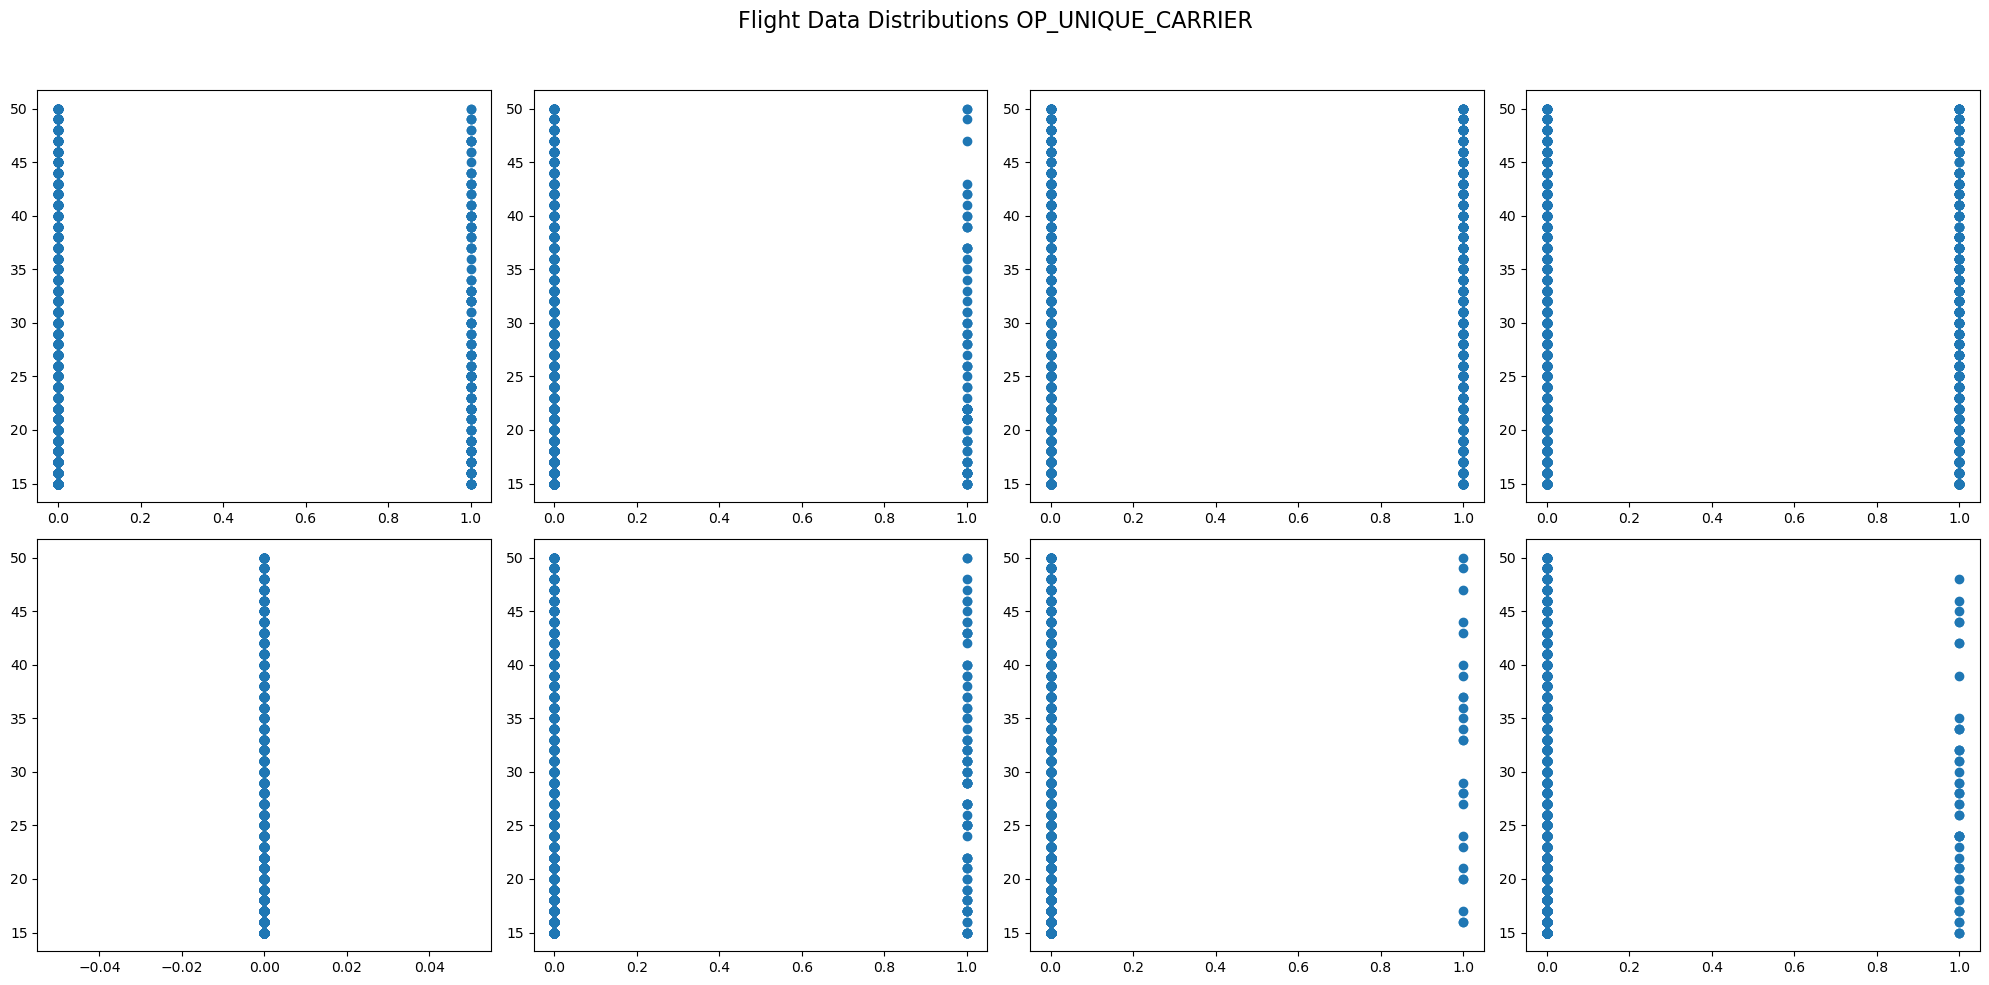

In [69]:
fig, axs = plt.subplots(2, 4, figsize=(20,10))

# Plot scatter plot  with labels
axs[0, 0].scatter('OP_UNIQUE_CARRIER_AA','DEP_DELAY' ,data=df)
# axs[0, 0].set_title('Scheduled Elapsed Time')
# axs[0, 0].set_xlabel('Time (minutes)')
# axs[0, 0].set_ylabel('Departure Delay')

axs[0, 1].scatter('OP_UNIQUE_CARRIER_AS','DEP_DELAY' ,data=df)
# axs[0, 1].set_title('Distance')
# axs[0, 1].set_xlabel('Distance')
# axs[0, 1].set_ylabel('Departure Delay')

axs[0,2].scatter('OP_UNIQUE_CARRIER_B6','DEP_DELAY' ,data=df)
# axs[0,2].set_title('Scheduled Departure Time')
# axs[0,2].set_xlabel('CRS_DEP_M')
# axs[0,2].set_ylabel('Departure Delay')

axs[0,3].scatter('OP_UNIQUE_CARRIER_DL','DEP_DELAY' ,data=df)
# axs[0,3].set_title('Scheduled Arrival Time')
# axs[0,3].set_xlabel('CRS_ARR_M')
# axs[0,3].set_ylabel('Departure Delay')

# Plot scatter plot with labels
axs[1,0].scatter('OP_UNIQUE_CARRIER_HA','DEP_DELAY',data=df)
# axs[1,0].set_title('Temperature')
# axs[1,0].set_xlabel('Temperature')
# axs[1,0].set_ylabel('Departure Delay')

axs[1,1].scatter('OP_UNIQUE_CARRIER_MQ','DEP_DELAY',data=df)
# axs[1,1].set_title('')
# axs[1,1].set_xlabel('Dew Point')
# axs[1,1].set_ylabel('Departure Delay')

axs[1,2].scatter('OP_UNIQUE_CARRIER_OO','DEP_DELAY',data=df)
# axs[1,2].set_title('Humidity')
# axs[1,2].set_xlabel('Humidity')
# axs[1,2].set_ylabel('Departure Delay')

axs[1,3].scatter('OP_UNIQUE_CARRIER_YX','DEP_DELAY',data=df)
# axs[1,3].set_title('Wind Speed')
# axs[1,3].set_xlabel('Wind Speed')
# axs[1,3].set_ylabel('Departure Delay')


# Add a main title for the entire figure
fig.suptitle('Flight Data Distributions OP_UNIQUE_CARRIER', fontsize=16)

# Adjust layout for better spacing
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Make space for the suptitle

# Display the plot
plt.show()

### DEST_AUS and DEST_ATL (Binary Features)

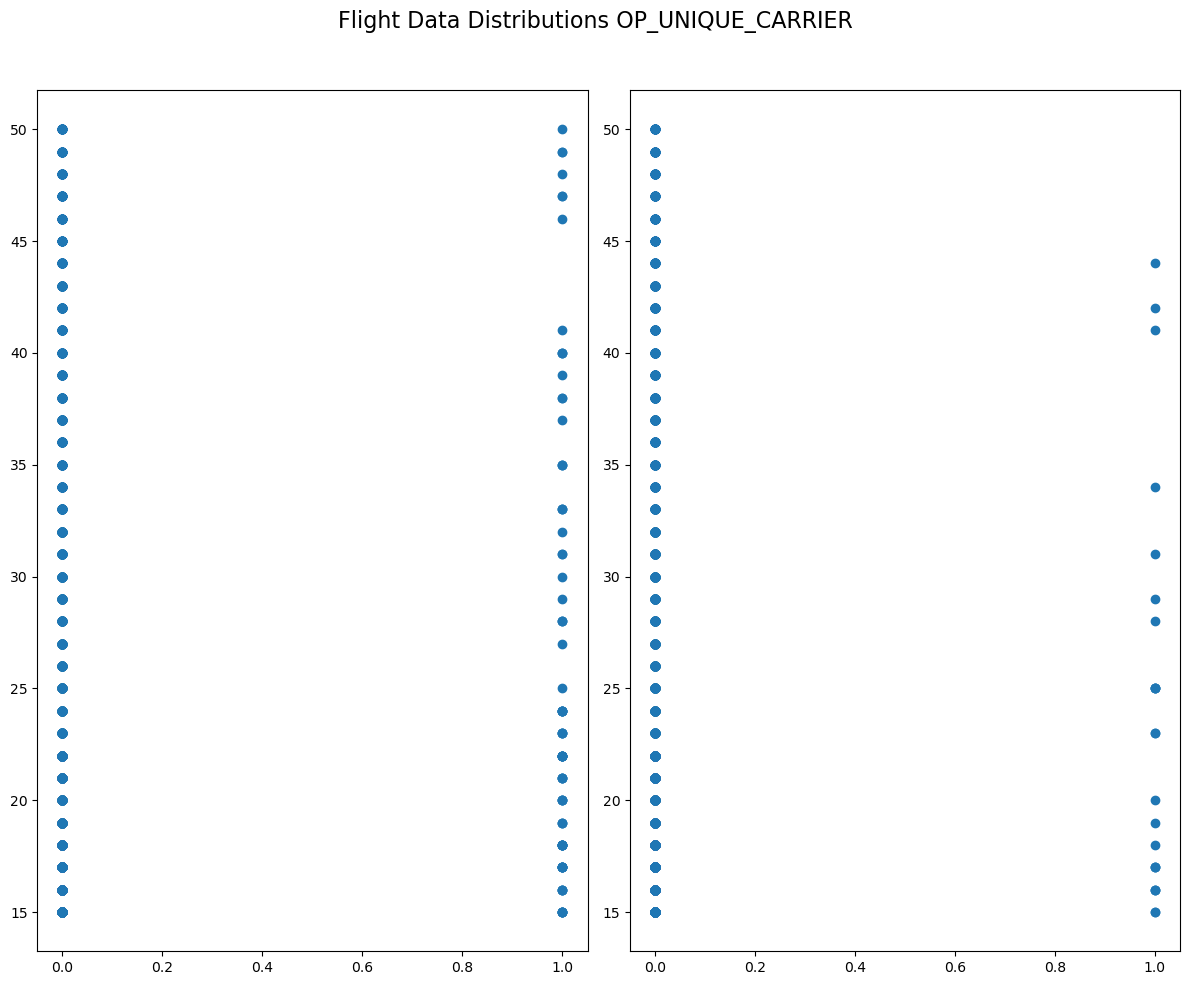

In [67]:
fig, axs = plt.subplots(1, 2, figsize=(12,10))

# Plot scatter plot  with labels
axs[0].scatter('DEST_ATL','DEP_DELAY' ,data=df)
# axs[0, 0].set_title('Scheduled Elapsed Time')
# axs[0, 0].set_xlabel('Time (minutes)')
# axs[0, 0].set_ylabel('Departure Delay')

axs[1].scatter('DEST_AUS','DEP_DELAY' ,data=df)
# axs[0, 1].set_title('Distance')
# axs[0, 1].set_xlabel('Distance')
# axs[0, 1].set_ylabel('Departure Delay')


# Add a main title for the entire figure
fig.suptitle('Flight Data Distributions OP_UNIQUE_CARRIER', fontsize=16)

# Adjust layout for better spacing
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Make space for the suptitle

# Display the plot
plt.show()

### Conclusion 

After plotting each feature vs the target variable (DEP_DELAY), almost all features do not show any correlation